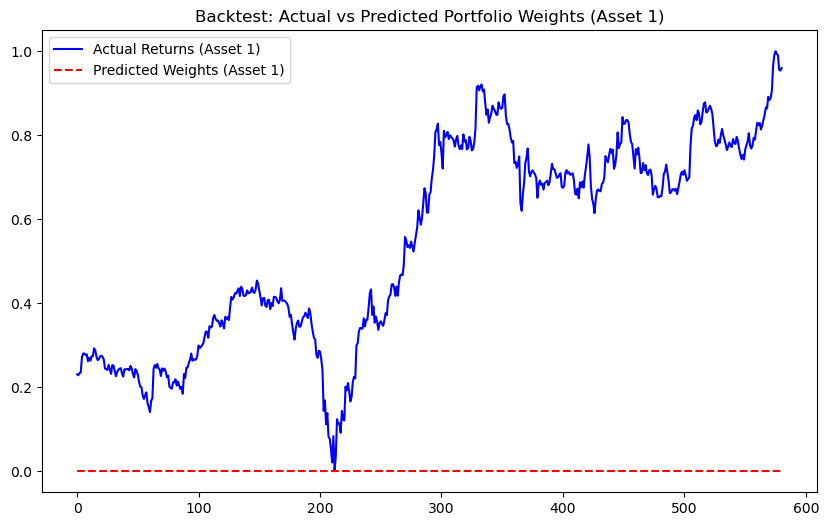

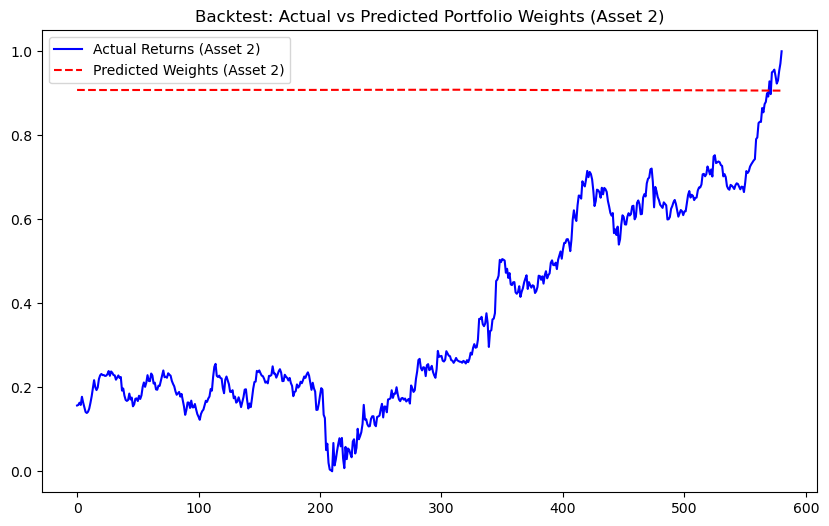

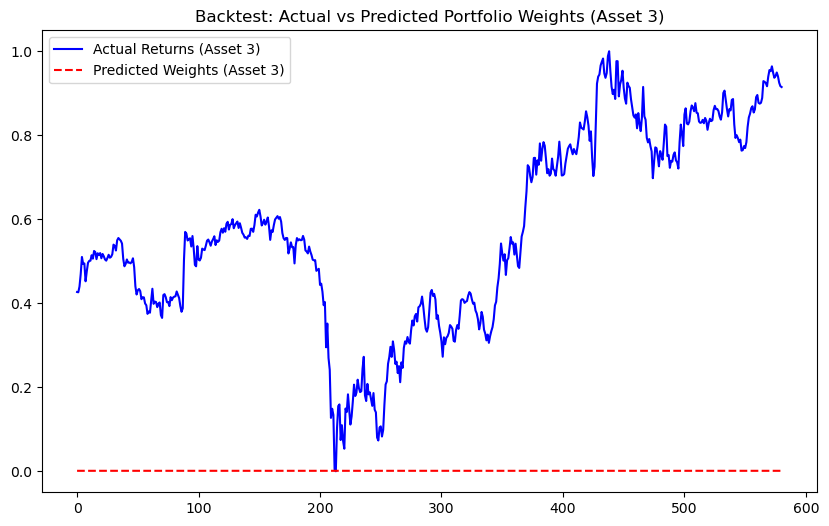

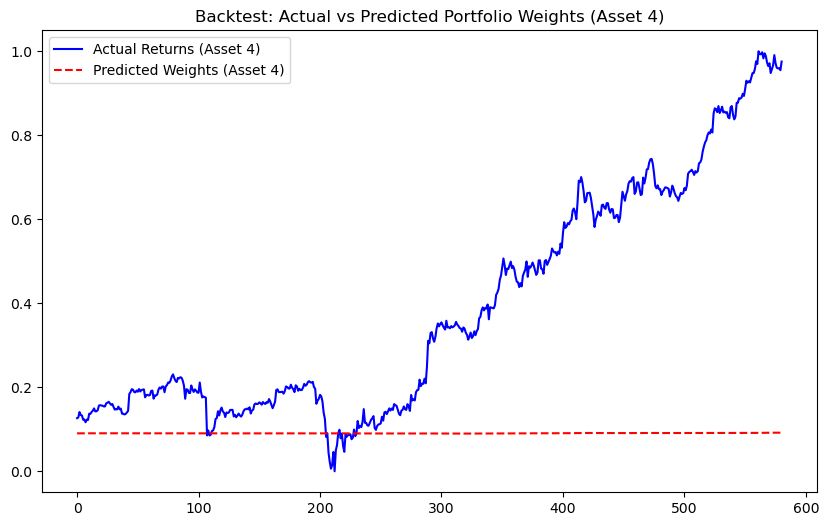

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load backtest results
with open('/Users/pranayvij/MTP-Work/results/transformer_backtest_results.json', 'r') as f:
    backtest_results = json.load(f)

actual = backtest_results['actual']
predicted = backtest_results['predicted']

# Initialize lists to store processed data
actual_processed = []
predicted_processed = []

# Loop through each batch and ensure consistent shape
for a, p in zip(actual, predicted):
    a_array = np.array(a, dtype=object)  # Use dtype=object to handle varying lengths
    p_array = np.array(p, dtype=object)
    
    # Only append if shapes are consistent (e.g., 2D)
    if a_array.ndim == 2 and p_array.ndim == 2:
        actual_processed.append(a_array)
        predicted_processed.append(p_array)

# If actual_processed and predicted_processed are not empty, proceed
if actual_processed and predicted_processed:
    # Convert to NumPy arrays by concatenating the processed batches
    actual_np = np.concatenate(actual_processed, axis=0)
    predicted_np = np.concatenate(predicted_processed, axis=0)
    
    num_assets = actual_np.shape[1]  # Number of assets

    # Loop through all assets and plot actual vs predicted for each
    for asset in range(num_assets):
        plt.figure(figsize=(10, 6))
        plt.plot(actual_np[:, asset], label=f'Actual Returns (Asset {asset + 1})', color='blue')
        plt.plot(predicted_np[:, asset], label=f'Predicted Weights (Asset {asset + 1})', color='red', linestyle='--')
        plt.title(f'Backtest: Actual vs Predicted Portfolio Weights (Asset {asset + 1})')
        plt.legend()
        plt.show()
else:
    print("No valid data to process and plot.")
